In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

from diffms import ROOT


mol_path = ROOT / "examples" / "test"

with (open(mol_path / "true.pkl", "rb")) as openfile:
    true_mols = pickle.load(openfile)

with open(mol_path / "pred.pkl", "rb") as openfile:
    predicted_mols = pickle.load(openfile)

In [3]:
import numpy as np
from rdkit.Chem import DataStructs
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.rdchem import Mol

from diffms.utils import tanimoto_sim

def mol_to_fingerprint(m: Mol, radius: int = 3, nbits: int = 2048):
    morgan_gen = rdFingerprintGenerator.GetMorganGenerator(
        radius=radius,
        fpSize=nbits
    )

    curr_fp = morgan_gen.GetFingerprint(m)

    fingerprint = np.zeros((0,), dtype=np.uint8)
    DataStructs.ConvertToNumpyArray(curr_fp, fingerprint)
    
    return fingerprint

def tanimoto_sim_mol(mol1: Mol, mol2: Mol):
    fp1 = mol_to_fingerprint(mol1)
    fp2 = mol_to_fingerprint(mol2)

    return tanimoto_sim(fp1, fp2)

[14:42:30] Can't kekulize mol.  Unkekulized atoms: 0 1 7 12 19
[14:42:30] Explicit valence for atom # 3 P, 6, is greater than permitted
[14:42:30] Explicit valence for atom # 5 O, 3, is greater than permitted
[14:42:30] Can't kekulize mol.  Unkekulized atoms: 1 6 7 12 18
[14:42:30] Explicit valence for atom # 11 N, 4, is greater than permitted
[14:42:30] Can't kekulize mol.  Unkekulized atoms: 0 1 8 10 12 16 17
[14:42:30] Explicit valence for atom # 11 N, 4, is greater than permitted


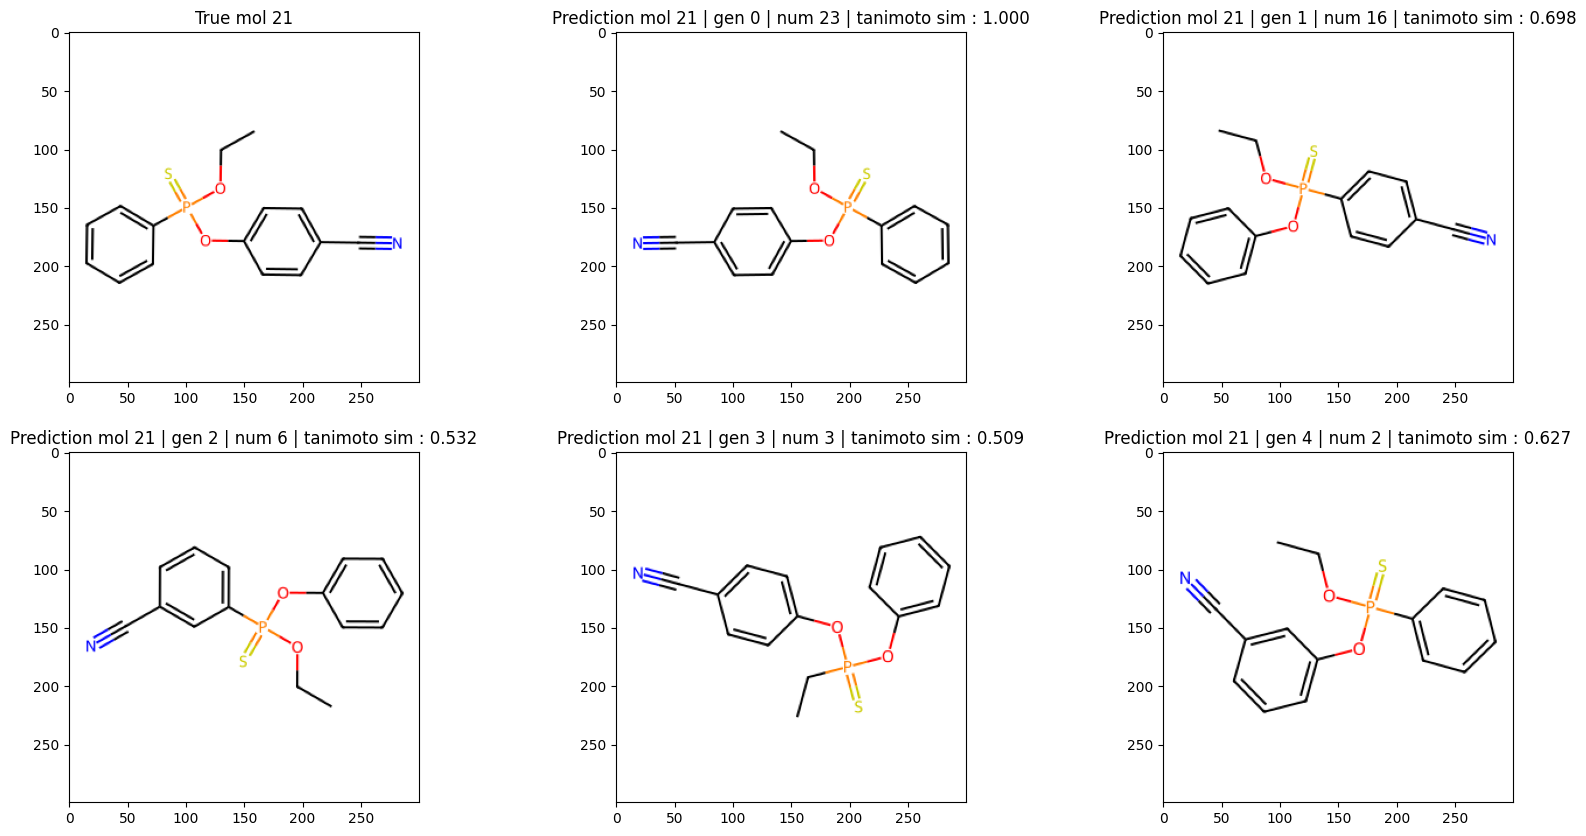

In [4]:
import random
from collections import Counter

import matplotlib.pyplot as plt
from rdkit.Chem import Draw, MolFromSmiles

from diffms.utils import is_valid, mol2smiles

idx = 21

tm = true_mols[idx]
preds = [p for p in predicted_mols[idx] if is_valid(p)]
c = Counter([mol2smiles(p) for p in preds])

top_smiles = [(MolFromSmiles(s), num) for s, num in c.most_common(5)]

tm_img = Draw.MolToImage(tm)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].imshow(tm_img)
ax[0][0].set_title(f"True mol {idx}")


for i, (pm, num) in enumerate(top_smiles):
    pm_img = Draw.MolToImage(pm)
    t_sim = tanimoto_sim_mol(tm, pm)

    ax[(i+1)//3][(i+1)%3].imshow(pm_img)
    ax[(i+1)//3][(i+1)%3].set_title(f"Prediction mol {idx} | gen {i} | num {num} | tanimoto sim : {t_sim:.3f}")

plt.show()

In [6]:
it = iter(range(len(true_mols)))

[14:51:03] Can't kekulize mol.  Unkekulized atoms: 0 3 5 14 21
[14:51:03] Explicit valence for atom # 6 C, 5, is greater than permitted
[14:51:03] Explicit valence for atom # 6 C, 5, is greater than permitted
[14:51:03] Can't kekulize mol.  Unkekulized atoms: 3 13 14 15 20
[14:51:03] Explicit valence for atom # 11 O, 3, is greater than permitted
[14:51:03] Explicit valence for atom # 17 O, 3, is greater than permitted
[14:51:03] non-ring atom 0 marked aromatic
[14:51:03] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:51:03] Explicit valence for atom # 2 C, 5, is greater than permitted
[14:51:03] Explicit valence for atom # 13 C, 5, is greater than permitted
[14:51:03] non-ring atom 12 marked aromatic
[14:51:03] Explicit valence for atom # 20 C, 5, is greater than permitted
[14:51:03] Can't kekulize mol.  Unkekulized atoms: 0 1 3 16 18
[14:51:03] Can't kekulize mol.  Unkekulized atoms: 3 18 19
[14:51:03] non-ring atom 5 marked aromatic
[14:51:03] Can't kekulize mol.  

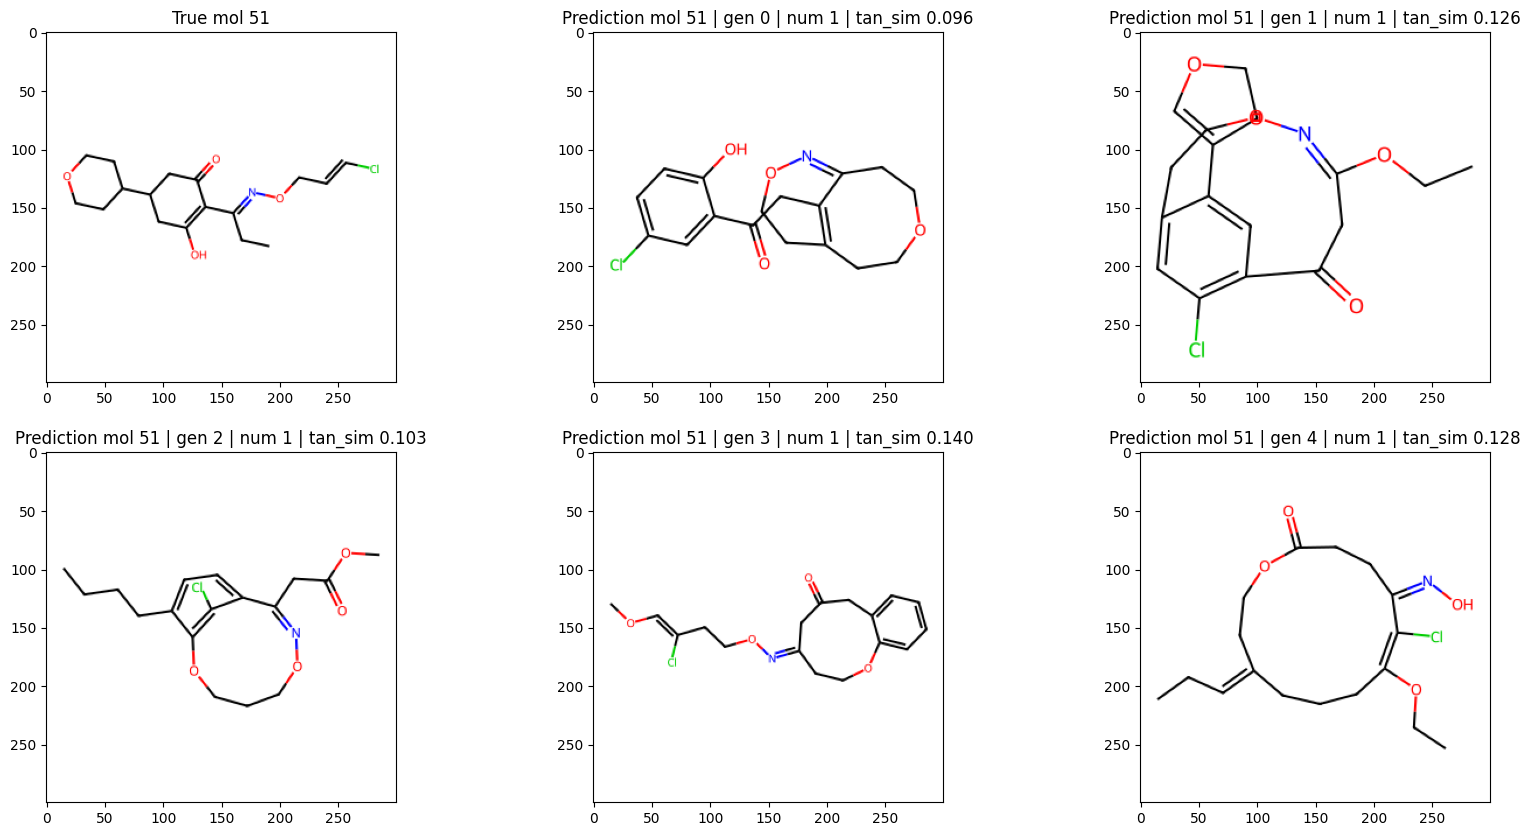

In [58]:
import random
from collections import Counter

import matplotlib.pyplot as plt
from rdkit.Chem import Draw, MolFromSmiles

from diffms.utils import is_valid, mol2smiles

idx = next(it)

tm = true_mols[idx]
preds = [p for p in predicted_mols[idx] if is_valid(p)]
c = Counter([mol2smiles(p) for p in preds])

top_smiles = [(MolFromSmiles(s), num) for s, num in c.most_common(5)]

tm_img = Draw.MolToImage(tm)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].imshow(tm_img)
ax[0][0].set_title(f"True mol {idx}")


for i, (pm, num) in enumerate(top_smiles):
    pm_img = Draw.MolToImage(pm)
    t_sim = tanimoto_sim_mol(tm, pm)

    ax[(i+1)//3][(i+1)%3].imshow(pm_img)
    ax[(i+1)//3][(i+1)%3].set_title(f"Prediction mol {idx} | gen {i} | num {num} | tan_sim {t_sim:.3f}")

plt.show()

### Look at the test samples
 

In [59]:
from omegaconf import DictConfig, OmegaConf
from hydra import compose, initialize
from hydra.core.global_hydra import GlobalHydra

GlobalHydra.instance().clear()

# Initialize once at the beginning of your notebook
initialize(config_path="../configs", version_base="1.3")

# Compose the config (same as Hydra would do on CLI)
cfg: DictConfig = compose(config_name="config")

In [60]:
from diffms.datasets import spec2mol_dataset

datamodule = spec2mol_dataset.Spec2MolDataModule(cfg)

231104it [00:01, 198570.93it/s]
231104it [00:38, 5977.30it/s]
231104it [00:00, 3488935.31it/s]


In [61]:
test_dataloader = datamodule.test_dataloader()

In [62]:
for b in test_dataloader:
    break

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefined stereo

[14:59:06] WARNING: Omitted undefi

In [74]:
import logging
import os

from diffms import ROOT
from diffms.analysis.visualization import MolecularVisualization
from diffms.datasets import spec2mol_dataset
from diffms.diffusion.extra_features import DummyExtraFeatures, ExtraFeatures
from diffms.diffusion.extra_features_molecular import ExtraMolecularFeatures
from diffms.diffusion_model_spec2mol import Spec2MolDenoisingDiffusion
from diffms.metrics.molecular_metrics_discrete import TrainMolecularMetricsDiscrete
from diffms.spec2mol_main import load_weights

dataset_infos = spec2mol_dataset.Spec2MolDatasetInfos(datamodule, cfg)
domain_features = ExtraMolecularFeatures(dataset_infos=dataset_infos)


if cfg.model.extra_features:
    extra_features = ExtraFeatures(cfg.model.extra_features, dataset_info=dataset_infos)
else:
    extra_features = DummyExtraFeatures()

dataset_infos.compute_input_output_dims(datamodule=datamodule, extra_features=extra_features, domain_features=domain_features)

logging.info("Dataset infos:", dataset_infos.output_dims)

# Get the other kwargs
train_metrics = TrainMolecularMetricsDiscrete(dataset_infos)
visualization_tools = MolecularVisualization(cfg.dataset.remove_h, dataset_infos=dataset_infos)

model_kwargs = {
    'dataset_infos': dataset_infos,
    'train_metrics': train_metrics,
    'visualization_tools': visualization_tools,
    'extra_features': extra_features, 
    'domain_features': domain_features,
}

# Init the model
model = Spec2MolDenoisingDiffusion(cfg=cfg, **model_kwargs)
weight_path = ROOT / cfg.general.load_weights
if not os.path.isfile:
    raise ValueError(f"The path indicated does not exist {weight_path}")

logging.info(f"Loading weights from {weight_path}")
model = load_weights(model, weight_path)

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo



[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Charges were rearranged

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Omitted undefined stereo

[15:14:08] WARNING: Charges were rearranged; Omitted undefined stereo

[15:14:08]

In [ ]:
from diffms import utils

data = b["graph"]
dense_data, node_mask = utils.to_dense(data.x, data.edge_index, data.edge_attr, data.batch)

In [75]:
import torch
from diffms.diffusion import diffusion_utils

z_T = diffusion_utils.sample_discrete_feature_noise(limit_dist=model.limit_dist, node_mask=node_mask)

In [76]:
z_T